# Titantic Classification Using ML Model

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1= pd.read_csv("titanic.csv")

In [3]:
df=df1.copy()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df[["Age","Fare","SibSp","Parch"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df_sinfo=df["Survived"].value_counts()
print("Survivors ",df_sinfo[1])
print("Non-survived:",df_sinfo[0])

Survivors  342
Non-survived: 549


In [12]:
print(df["Survived"].value_counts(normalize=True))

0    0.616162
1    0.383838
Name: Survived, dtype: float64


Non-survived percentage : % 61.61616161616161
Survived percentage : % 38.38383838383838


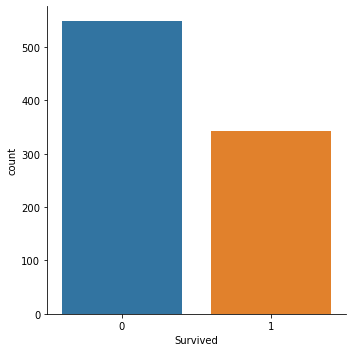

In [13]:
df_percentage=df["Survived"].value_counts(normalize=True)*100
print("Non-survived percentage : %",df_percentage[0])
print("Survived percentage : %",df_percentage[1])

sns.catplot(x="Survived",kind="count",data=df)

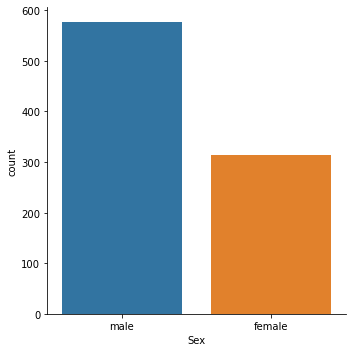

In [14]:
sns.catplot(x="Sex",kind="count",data=df)

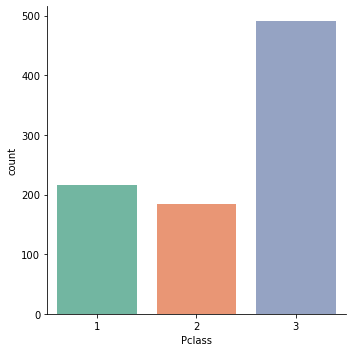

In [15]:
sns.catplot(x="Pclass",kind="count",data=df,palette="Set2")

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


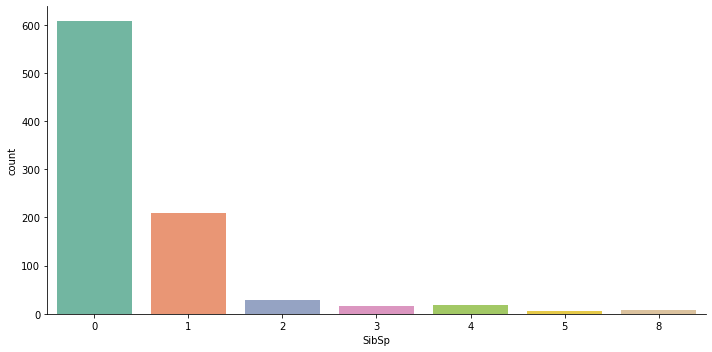

In [16]:
print(df["SibSp"].value_counts(normalize=True))
sns.catplot(x="SibSp",kind="count",data=df,palette="Set2",aspect=2)

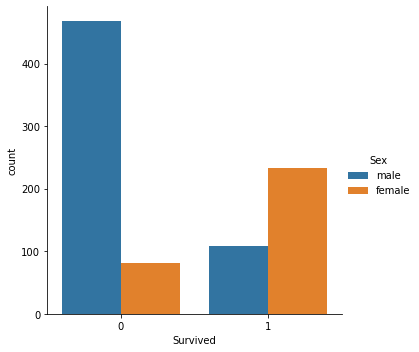

In [17]:
sns.catplot(x="Survived",kind="count",data=df,hue="Sex")

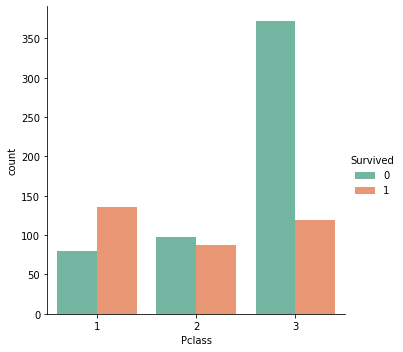

In [18]:
sns.catplot(x="Pclass",kind="count",data=df,hue="Survived",palette="Set2")

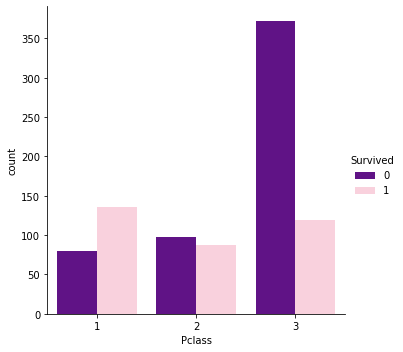

In [19]:
my_palette=['#660099','#FFCBDB']
sns.set_palette(my_palette)

sns.catplot(x="Pclass",kind="count",hue="Survived", data=df)

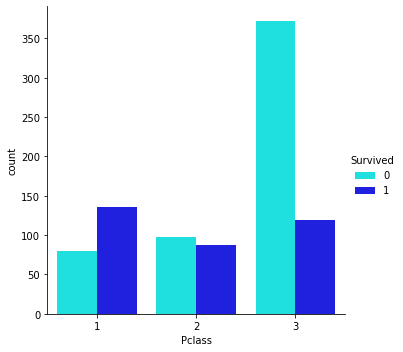

In [20]:
custom_palette=['cyan','blue']
sns.set_palette(custom_palette)

sns.catplot(x="Pclass",kind="count",hue="Survived", data=df)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

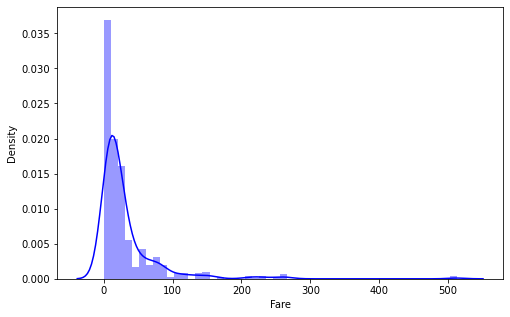

In [21]:
plt.figure(figsize=(8,5))
sns.distplot(df["Fare"],color="blue")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

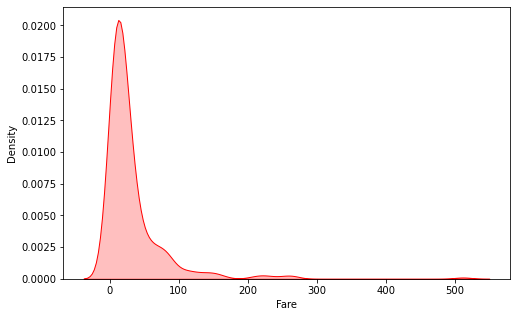

In [22]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Fare"],color="red",shade=True)

Text(0.5, 1.0, 'Fare Graphic')

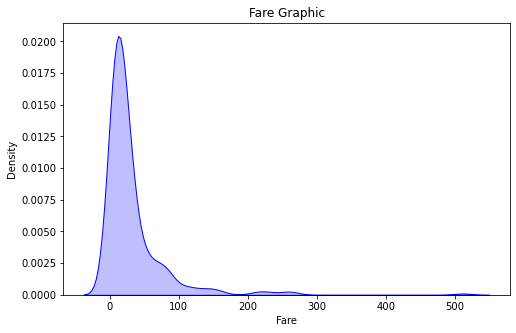

In [23]:
plt.figure(figsize=(8,5))
aw=sns.kdeplot(df["Fare"],color="blue",shade=True)
aw.set_title("Fare Graphic")

Text(0.5, 1.0, 'Age Graphic')

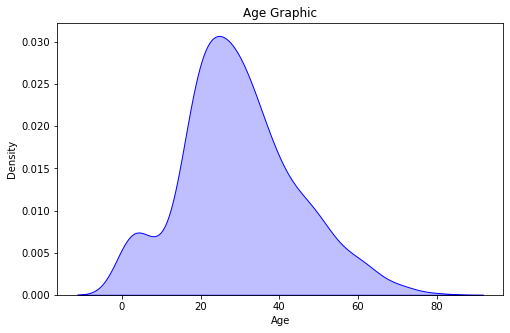

In [24]:
plt.figure(figsize=(8,5))
aw=sns.kdeplot(df["Age"],color="blue",shade=True)
aw.set_title("Age Graphic")

Text(0.5, 1.0, 'Age vs Fare')

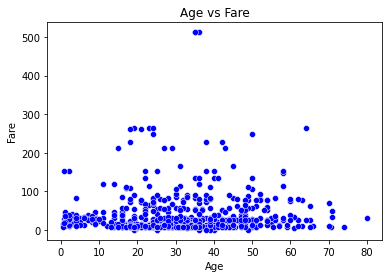

In [25]:
sns.scatterplot(x="Age",y="Fare",data=df,color="blue").set_title("Age vs Fare")

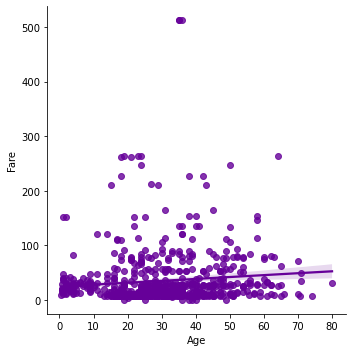

In [26]:
custom_palette=['#660099']
sns.set_palette(custom_palette)
sns.lmplot(x="Age",y="Fare",data=df,palette="Set3")

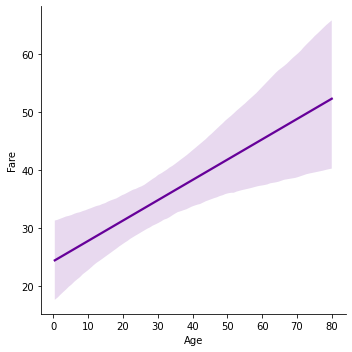

In [27]:
sns.lmplot(x="Age",y="Fare",data=df,palette="Set3",scatter=False)